In [1]:
import pandas as pd # pandas will be referred to as pd below
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_Expenditure= pd.read_csv('gdp.csv')
data_Expenditure.head()

,country,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0873,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,0.230,0.367,0.196,0.164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,0.418,0.419,0.411,0.453,0.439,0.424,0.388,0.410,0.404,...,0.45,0.4580,0.470,0.586,0.561,0.566,0.636,0.620,0.589,NaN
3,Armenia,NaN,0.187,0.226,0.214,0.191,0.279,0.253,0.322,0.256,...,0.24,0.2110,0.224,0.291,0.241,0.270,0.238,0.222,0.241,0.251
4,Australia,1.660,NaN,1.510,NaN,1.580,NaN,1.750,NaN,1.850,...,2.18,NaN,2.400,NaN,2.380,2.250,NaN,2.200,NaN,NaN


In [3]:
data_Users= pd.read_csv('users.csv')
data_Users.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,10.6,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,2.30,2.8,3.1,6.50,8.9,10.2,12.40,13.0,NaN


In [4]:
columns_1 = ['country','1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']
data_Users = data_Users.loc[:,columns_1]
data_Users.columns

Index(['country', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [5]:
print('Expenditure original length: '+ str(len(data_Expenditure)))
data_Expenditure_NoMissing= data_Expenditure.dropna()
print('Expenditure new length: '+ str(len(data_Expenditure_NoMissing)))

Expenditure original length: 132
Expenditure new length: 29


In [6]:
print('Users original length: '+ str(len(data_Users)))
data_Users_NoMissing= data_Users.dropna()
print('Users new length: '+ str(len(data_Users_NoMissing)))

Users original length: 194
Users new length: 62


In [7]:
column_1 =['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017']
data_Expenditure=pd.melt(data_Expenditure, id_vars='country', value_vars=column_1, var_name='year', value_name = 'users')
data_Expenditure.head()

,country,year,users
0,Albania,1996,NaN
1,Algeria,1996,NaN
2,Argentina,1996,0.418
3,Armenia,1996,NaN
4,Australia,1996,1.660


In [8]:
data_Users=pd.melt(data_Users, id_vars='country', value_vars=column_1, var_name='year', value_name = 'expenditure')
data_Users.head()

,country,year,expenditure
0,Afghanistan,1996,NaN
1,Albania,1996,0.03220
2,Algeria,1996,0.00174
3,Andorra,1996,1.53000
4,Angola,1996,0.00078


In [9]:
data_Expenditure_NoMissing = pd.melt(data_Expenditure_NoMissing, id_vars='country', value_vars=column_1, var_name='year', value_name = 'expenditure')
data_Users_NoMissing = pd.melt(data_Users_NoMissing, id_vars='country', value_vars=column_1, var_name='year', value_name = 'user')
data = pd.merge(left= data_Expenditure_NoMissing, right= data_Users_NoMissing)
data.head(5)

,country,year,expenditure,user
0,Austria,1996,1.590,6.9100
1,Belgium,1996,1.730,2.9700
2,Bulgaria,1996,0.509,0.7250
3,China,1996,0.563,0.0131
4,Czech Republic,1996,0.899,1.9400


In [10]:
print('Data length: '+ str(len(data)))

Data length: 528


In [11]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            518, 519, 520, 521, 522, 523, 524, 525, 526, 527],
           dtype='int64', length=528)

In [55]:
data['year']= pd.to_numeric(data['year'])
data['expenditure']= pd.to_numeric(data['expenditure'])
data['user']= pd.to_numeric(data['user'])
print(len(data['year']))
print(len(data['expenditure']))
print(len(data['user']))

480
480
480


In [13]:
countArea= data['country'].value_counts(sort= True, ascending=False, dropna=False)
print(countArea.head(5))
print()
perArea= data['country'].value_counts(sort= True, ascending=False, dropna=False, normalize=True)
print(perArea.head(5))
print()
print ('Number of Different Areas: '+ str(len(countArea)))
print ('Number of observations for the Area column:'+ str(len(data['country'])))

Italy        22
Finland      22
China        22
Lithuania    22
Slovenia     22
Name: country, dtype: int64

Italy        0.041667
Finland      0.041667
China        0.041667
Lithuania    0.041667
Slovenia     0.041667
Name: country, dtype: float64

Number of Different Areas: 24
Number of observations for the Area column:528


In [14]:
print ('Year ranges from '+ str(data['year'].min())+' and to '+ str(data['year'].max()) )
countYear= data['year'].value_counts(sort= False, dropna=False)
print(countYear.head())
perYear= data['year'].value_counts(sort= False, dropna=False, normalize=True)
print(perYear.head(5))
print ('Number of Different Years: '+ str(len(countYear)))

Year ranges from 1996 and to 2017
1996    24
1997    24
1998    24
1999    24
2000    24
Name: year, dtype: int64
1996    0.045455
1997    0.045455
1998    0.045455
1999    0.045455
2000    0.045455
Name: year, dtype: float64
Number of Different Years: 22


In [15]:
countExpenditure= data['expenditure'].value_counts(sort= False, dropna=False) 
# dropna=False  required, otherwise python does not show mising values

print(countExpenditure.head(5))
perExpenditure= data['expenditure'].value_counts(sort= False, dropna=False, normalize=True)
print(perExpenditure.head(5))
print ('Number of Different Expenditure values: '+ str(len(countExpenditure)))

1.250    4
1.000    3
3.250    2
2.000    2
0.375    1
Name: expenditure, dtype: int64
1.250    0.007576
1.000    0.005682
3.250    0.003788
2.000    0.003788
0.375    0.001894
Name: expenditure, dtype: float64
Number of Different Expenditure values: 333


In [16]:
countUser= data['user'].value_counts(sort= False, dropna=False)
print(countUser.head(5))
perUser= data['user'].value_counts(sort= False, dropna=False, normalize=True)
print(perUser.head(5))
print ('Number of Different user rates: '+ str(len(countUser)))

19.50    2
4.25     1
25.50    1
23.00    1
7.00     1
Name: user, dtype: int64
19.50    0.003788
4.25     0.001894
25.50    0.001894
23.00    0.001894
7.00     0.001894
Name: user, dtype: float64
Number of Different user rates: 428


In [17]:
data= data.dropna(subset =['expenditure','user'], how='any')

data= data.reset_index(drop=True) # not to save old index as a column
print('Lenghth of the new dataframe: '+str(len(data)))

Lenghth of the new dataframe: 480


In [18]:
print ('Expenditure ranges from '+ str(data['expenditure'].min())+' and to '+ str(data['expenditure'].max()) )
data['expenditure'].describe()

Expenditure ranges from 0.259 and to 4.41


count    480.000000
mean       1.571331
std        1.025718
min        0.259000
25%        0.681250
50%        1.255000
75%        2.210000
max        4.410000
Name: expenditure, dtype: float64

In [19]:
data['ExpenditureGroup']= pd.cut(data.expenditure, [0.25,1,1.75,2.50,3.25,4.40]) 
# no need to sort the data frame.

print(len(data))
print(len(data['ExpenditureGroup']))

480
480


In [20]:
data['ExpenditureGroup']= data['ExpenditureGroup'].astype("category")
data['ExpenditureGroup'].describe()

count             479
unique              5
top       (0.25, 1.0]
freq              183
Name: ExpenditureGroup, dtype: object

In [21]:
ExpenditureGroupP= data['ExpenditureGroup'].value_counts(sort= False, normalize= True) 
# value_counts() should make more sense now
print(ExpenditureGroupP)

(0.25, 1.0]    0.382046
(1.0, 1.75]    0.227557
(1.75, 2.5]    0.206681
(2.5, 3.25]    0.098121
(3.25, 4.4]    0.085595
Name: ExpenditureGroup, dtype: float64


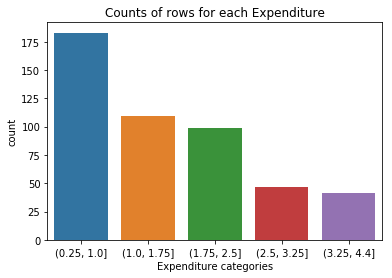

In [22]:
seaborn.countplot(x= 'ExpenditureGroup', data= data)
plt.xlabel('Expenditure categories')
plt.title('Counts of rows for each Expenditure')
plt.show()

Text(0.5,1,'Counts of rows for each Expenditure')

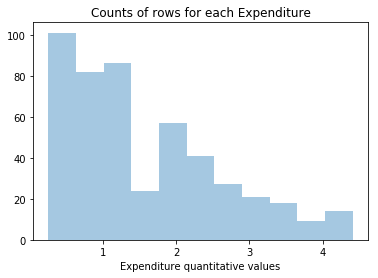

In [23]:
seaborn.distplot(data['expenditure'].dropna(), kde= False)
plt.xlabel('Expenditure quantitative values')
plt.title('Counts of rows for each Expenditure')

In [24]:
print ('Users from '+ str(data['user'].min())+' and to '+ 
       str(data['user'].max()) )
data['user'].describe()

Users from 0.0131 and to 94.0


count    480.000000
mean      42.497078
std       28.691072
min        0.013100
25%       14.375000
50%       44.000000
75%       68.625000
max       94.000000
Name: user, dtype: float64

In [25]:
data['UserGroup']= pd.cut(data.user, [0.01,10,25,50,70,94]) 

In [26]:
data['UserGroup']= data['UserGroup'].astype('category')
data['UserGroup'].describe()

count              480
unique               5
top       (70.0, 94.0]
freq               109
Name: UserGroup, dtype: object

In [27]:
UG= data['UserGroup'].value_counts(sort= False, normalize= True)
print(UG)

(0.01, 10.0]    0.216667
(10.0, 25.0]    0.127083
(25.0, 50.0]    0.220833
(50.0, 70.0]    0.208333
(70.0, 94.0]    0.227083
Name: UserGroup, dtype: float64


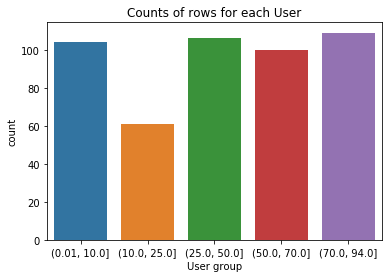

In [28]:
seaborn.countplot(x= 'UserGroup', data= data)
plt.xlabel('User group')
plt.title('Counts of rows for each User')
plt.show()

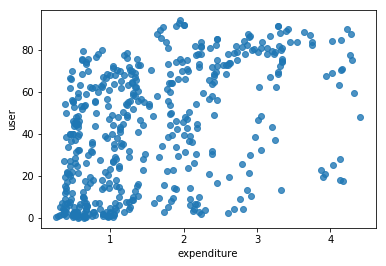

In [57]:
seaborn.regplot(x= "expenditure", y= "user", fit_reg= False, data= data)

In [30]:
data2= data[data['year']>=2000]

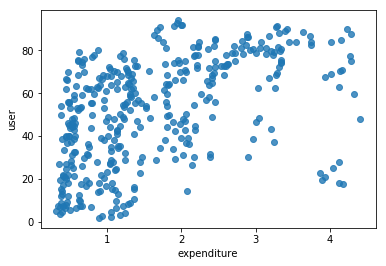

In [31]:
seaborn.regplot(x= "expenditure", y= "user", fit_reg= False, data= data2)

In [58]:
UG= data['UserGroup'].value_counts(sort= False, normalize= True)
print(UG)

(0.01, 10.0]    0.216667
(10.0, 25.0]    0.127083
(25.0, 50.0]    0.220833
(50.0, 70.0]    0.208333
(70.0, 94.0]    0.227083
Name: UserGroup, dtype: float64


In [33]:
def USER (row):
    if row['user'] < 50 :
        return 0
    else:
        return 1

In [34]:
data2['User']= data2.apply(lambda row : USER(row), axis= 1)
# axis=1, tells python to apply this function to each row 
# Arbitrary functions can be applied along the axes of a DataFrame using the apply() method
data2['User'].value_counts()

1    210
0    174
Name: User, dtype: int64

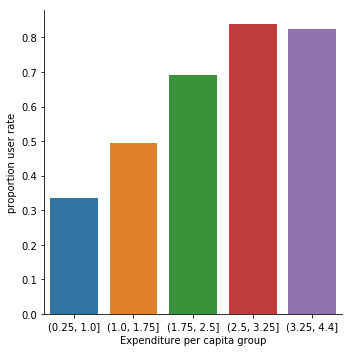

In [35]:
seaborn.factorplot(x= 'ExpenditureGroup', y= 'User', data= data2, kind= "bar", ci=None)
plt.xlabel('Expenditure per capita group')
plt.ylabel('proportion user rate')
plt.show()

In [64]:
0.25,1,1.75,2.50,3.25,4.40
def ExpenditureRangeGroup (row):
    if row['expenditure'] > 0.25 and row['expenditure']<= 1.0 :
        return 1
    if row['expenditure'] > 1.0 and row['expenditure']<= 1.75 :
        return 2
    if row['expenditure'] > 1.75 and row['expenditure']<= 2.50 :
        return 3
    if row['expenditure'] > 2.50 and row['expenditure']<= 3.25 :
        return 4
    if row['expenditure'] > 3.25 and row['expenditure']<= 4.40 :
        return 5

In [37]:
data2['ExpenditureCat'] = data2.apply (lambda row: ExpenditureRangeGroup (row),axis=1)

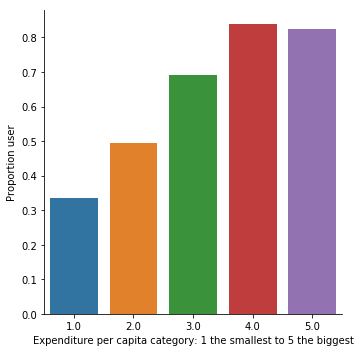

In [38]:
seaborn.factorplot(x= 'ExpenditureCat', y= 'User', data= data2, kind= "bar", ci=None)
plt.xlabel('Expenditure per capita category: 1 the smallest to 5 the biggest')
plt.ylabel('Proportion user')
plt.show()

In [39]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

In [40]:
data3= data2[['User', 'ExpenditureCat']]
print(data3)

     User  ExpenditureCat
96      0             3.0
97      0             3.0
98      0             1.0
99      0             1.0
100     0             2.0
101     0             4.0
102     0             3.0
103     0             3.0
104     0             1.0
105     0             5.0
106     0             1.0
107     0             4.0
108     0             1.0
109     0             1.0
110     0             1.0
111     0             3.0
112     0             1.0
113     0             1.0
114     0             1.0
115     0             2.0
116     0             1.0
117     0             2.0
118     0             3.0
119     0             1.0
120     0             3.0
121     0             3.0
122     0             1.0
123     0             1.0
124     0             2.0
125     0             4.0
..    ...             ...
450     1             1.0
451     1             2.0
452     1             1.0
453     1             3.0
454     1             5.0
455     1             2.0
456     1   

In [41]:
model1= smf.ols(formula='User ~ C(ExpenditureCat)', data=data3)

In [42]:
results= model1.fit()

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   User   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     16.32
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           2.41e-12
Time:                        11:25:37   Log-Likelihood:                -245.67
No. Observations:                 383   AIC:                             501.3
Df Residuals:                     378   BIC:                             521.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [65]:
mc1 = multi.MultiComparison(data3['User'], data3['ExpenditureCat'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 1.0    2.0    0.159   -0.0185 0.3365 False 
 1.0    3.0    0.3564   0.1669 0.5459  True 
 1.0    4.0    0.502    0.2553 0.7486  True 
 1.0    5.0    0.4891   0.2498 0.7285  True 
 1.0    nan   -0.3359  -1.6659 0.9942 False 
 2.0    3.0    0.1975  -0.0041 0.399  False 
 2.0    4.0    0.343    0.087  0.599   True 
 2.0    5.0    0.3302   0.0812 0.5791  True 
 2.0    nan   -0.4948  -1.8267 0.837  False 
 3.0    4.0    0.1455   -0.119  0.41  False 
 3.0    5.0    0.1327   -0.125 0.3904 False 
 3.0    nan   -0.6923  -2.0258 0.6412 False 
 4.0    5.0   -0.0128  -0.3151 0.2894 False 
 4.0    nan   -0.8378  -2.1806 0.505  False 
 5.0    nan    -0.825  -2.1665 0.5165 False 
--------------------------------------------


In [45]:
import scipy.stats

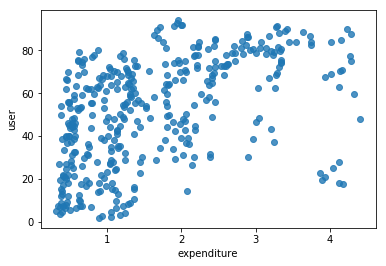

In [46]:
seaborn.regplot(x= "expenditure", y= "user", fit_reg= False, data= data2)

In [66]:
print('association between Expenditure and Users')
print(scipy.stats.pearsonr(data2['expenditure'], data2['user']))

association between Expenditure and Users
(0.48985762338515526, 1.434666336110515e-24)
